<a href="https://colab.research.google.com/github/romaoeh/WHR/blob/main/Capstone_III_World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**World Happiness Report Analysis**
```
by Roma Oeh
```


## **O V E R V I E W :**

I want to know what factors contribute most to the Happiness Score across the different countries. Which  countries are the happiest versus which are the most unhappy?

Is there a relationship between GDP Per Capita and the Happiness Score? Can money, in fact, buy happiness?



Is there a correlation between Perceptions of Corruption and Confidence in National Government? Do the injustices of corruption lower a society’s political trust?


[Link To Dataset ](https://www.kaggle.com/datasets/usamabuttar/world-happiness-report-2005-present)

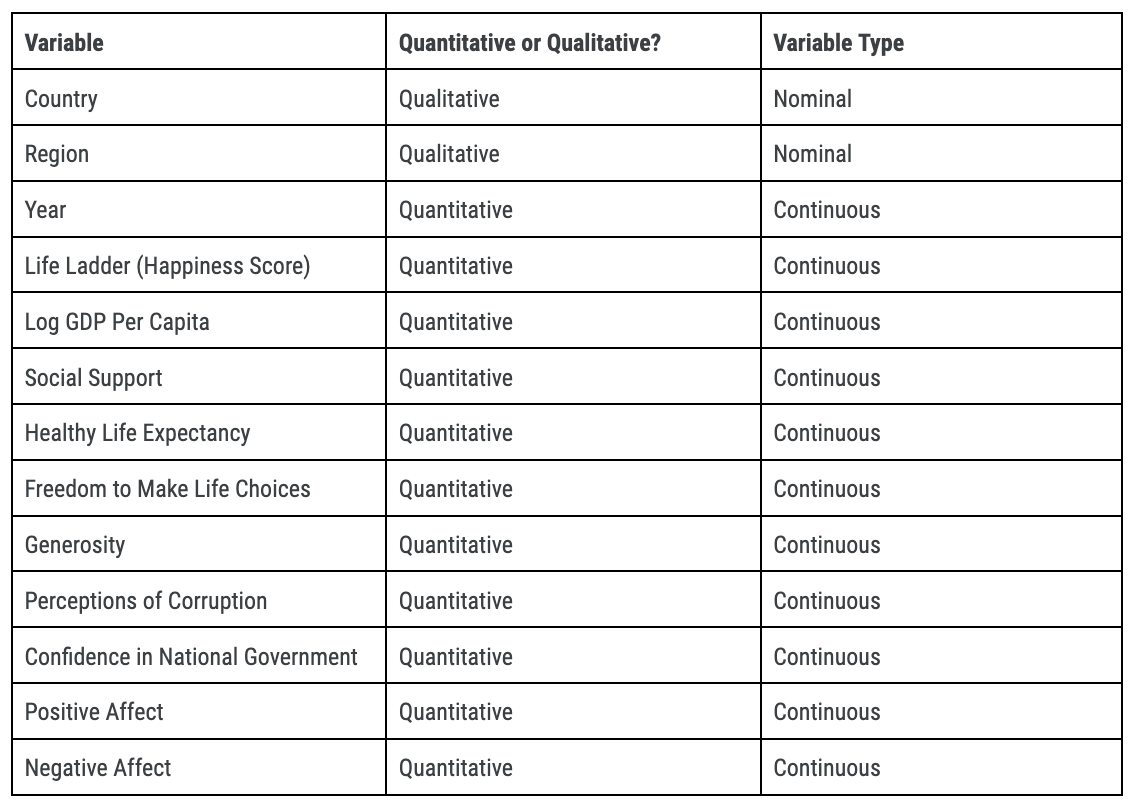

## **Goals**

(1.) Examine relationship between Life Ladder (Happiness Score) and GDP Per Capita

(2.) Examine relationship between Perceived Corruption and Confidence in Government

## **Hypotheses**

(1.)
H0: There is no significant correlation in score between Life Ladder and GDP Per Capita

Ha: There is a significant correlation in score between Life Ladder and GDP Per Capita


(2.)
H0: There is no significant correlation in score between Perceptions Of Corruption and Confidence in National Government

Ha: There is a significant correlation in score between Perceptions Of Corruption and Confidence in National Government

### Importing Data

In [ ]:
# Mounting my Google Drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Import pandas and read in the GDrive-mounted CSV

import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import datetime
plt.style.use('ggplot')
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/World Happiness Report.csv')

df.columns



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [ ]:
# Examining my DataFrame
df.shape


(2199, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2179 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2166 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2083 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

In [ ]:
df.head(10)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990
9,Afghanistan,South Asia,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,0.435270,0.371326,0.261179


In [ ]:
df.tail(10)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
2189,Zimbabwe,Sub-Saharan Africa,2013,4.690188,7.755187,0.799274,48.799999,0.575884,-0.089405,0.830937,0.623596,0.182288,0.527755
2190,Zimbabwe,Sub-Saharan Africa,2014,4.184451,7.748009,0.765839,50.000000,0.642034,-0.058242,0.820217,0.661307,0.239111,0.566209
2191,Zimbabwe,Sub-Saharan Africa,2015,3.703191,7.746680,0.735800,51.200001,0.667193,-0.107365,0.810457,0.639002,0.178861,0.590012
2192,Zimbabwe,Sub-Saharan Africa,2016,3.735400,7.734831,0.768425,51.674999,0.732971,-0.078541,0.723612,0.685256,0.208555,0.699344
2193,Zimbabwe,Sub-Saharan Africa,2017,3.638300,7.754387,0.754147,52.150002,0.752826,-0.080725,0.751208,0.733641,0.224051,0.682647
2194,Zimbabwe,Sub-Saharan Africa,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,0.550508
2195,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455
2196,Zimbabwe,Sub-Saharan Africa,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,0.577302
2197,Zimbabwe,Sub-Saharan Africa,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682,0.665703
2198,Zimbabwe,Sub-Saharan Africa,2022,3.296220,7.670123,0.666172,54.525002,0.651987,-0.069513,0.752632,0.640609,0.191350,NaN


In [ ]:
# See how many countries are in 'Country Name' column
df['Country Name'].nunique()

165

### Cleaning Data

In [ ]:
# Print original size of DataFrame
print(df.size)

28587


In [ ]:
# Drop `NaN` rows
clean_df = df.dropna()

# Print the size of the modified DataFrame
print(clean_df.size)

21879


In [ ]:
# Print details for a given Series
clean_df[['Life Ladder', 'Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Confidence In National Government']].describe()


,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Confidence In National Government
count,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000
mean,5.484487,9.355232,0.812622,63.151230,0.748815,0.483957
std,1.149633,1.154303,0.121037,7.178640,0.136542,0.192992
min,2.178809,5.526723,0.290934,6.720000,0.260069,0.078787
25%,4.620406,8.427542,0.743757,58.420000,0.659158,0.333443
50%,5.431614,9.508173,0.839280,65.000000,0.768174,0.468150
75%,6.319366,10.316836,0.909040,68.924999,0.856921,0.618612
max,7.970892,11.663788,0.987343,74.349998,0.985178,0.993604


In [ ]:
# Data count per year
clean_df['Year'].value_counts()

2017    123
2019    120
2015    120
2018    120
2016    118
2014    118
2013    113
2011    109
2012    107
2021    102
2020     97
2008     95
2010     95
2009     87
2007     86
2006     72
2005      1
Name: Year, dtype: int64

In [ ]:
# Sort by Happiness Score aka "Life Ladder" to show Top 10 Happy Countries
sorted_df = clean_df.sort_values(by=['Life Ladder'], ascending=False)
sorted_df.head(10)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
507,Denmark,Western Europe,2008,7.970892,10.877718,0.953912,68.959999,0.969788,0.267880,0.247505,0.759462,0.163091,0.665934
635,Finland,Western Europe,2020,7.889350,10.767303,0.961621,71.074997,0.962424,-0.121018,0.163636,0.747939,0.192898,0.808633
633,Finland,Western Europe,2018,7.858107,10.779966,0.962155,70.925003,0.937807,-0.131462,0.198605,0.748826,0.181781,0.555102
506,Denmark,Western Europe,2007,7.834233,10.888726,0.954201,68.739998,0.932086,0.235808,0.206006,0.777936,0.194324,0.592506
636,Finland,Western Europe,2021,7.794378,10.794529,0.970289,71.150002,0.963190,-0.037467,0.191754,0.751612,0.175449,0.713731
632,Finland,Western Europe,2017,7.788252,10.769960,0.963826,70.849998,0.962199,-0.006553,0.192413,0.755858,0.176066,0.597539
510,Denmark,Western Europe,2011,7.788232,10.845314,0.961736,69.620003,0.934760,0.293352,0.220043,0.777892,0.174883,0.471823
634,Finland,Western Europe,2019,7.780348,10.791038,0.937416,71.000000,0.947617,-0.055773,0.195338,0.732282,0.180733,0.639188
1868,Switzerland,Western Europe,2012,7.776209,11.107383,0.946864,71.519997,0.945428,0.132033,0.323241,0.792705,0.176007,0.769940
509,Denmark,Western Europe,2010,7.770515,10.836152,0.974977,69.400002,0.943631,0.238271,0.174896,0.796209,0.154563,0.586689


In [ ]:
# Bottom 10 Happy Countries (Most Unhappy Countries)
sorted_df.tail(10)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
1953,Togo,Sub-Saharan Africa,2014,2.838959,7.509245,0.444339,53.759998,0.663193,-0.104942,0.795342,0.536514,0.442813,0.477110
1951,Togo,Sub-Saharan Africa,2008,2.807855,7.312004,0.291334,51.119999,0.286814,-0.074570,0.931986,0.397701,0.378715,0.170061
1126,Liberia,Sub-Saharan Africa,2015,2.701591,7.365848,0.637666,52.500000,0.671431,-0.062922,0.902673,0.519482,0.388489,0.472788
10,Afghanistan,South Asia,2018,2.694303,7.630801,0.507516,53.575001,0.373536,-0.091106,0.927606,0.384561,0.404904,0.364666
2195,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455
9,Afghanistan,South Asia,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,0.435270,0.371326,0.261179
1115,Lebanon,Middle East and North Africa,2020,2.633753,9.531043,0.546600,66.074997,0.551601,-0.136191,0.883977,0.352249,0.481800,0.124744
12,Afghanistan,South Asia,2021,2.436034,7.324032,0.454175,54.549999,0.394306,-0.081011,0.946299,0.178886,0.606713,0.255620
11,Afghanistan,South Asia,2019,2.375092,7.640086,0.419973,53.900002,0.393656,-0.106016,0.923849,0.324108,0.502474,0.341482
1116,Lebanon,Middle East and North Africa,2021,2.178809,9.470949,0.506775,66.150002,0.422697,-0.161281,0.905279,0.263487,0.569101,0.106694


In [ ]:
# Show Top 10 happiest countries in most recent year
recent_top10 = clean_df.sort_values(by=['Year','Life Ladder'], ascending=False)
recent_top10.head(10)


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
636,Finland,Western Europe,2021,7.794378,10.794529,0.970289,71.150002,0.963190,-0.037467,0.191754,0.751612,0.175449,0.713731
520,Denmark,Western Europe,2021,7.698747,10.967554,0.944927,71.250000,0.933439,0.131484,0.172681,0.791891,0.206422,0.651710
924,Israel,Middle East and North Africa,2021,7.577528,10.646882,0.916583,72.699997,0.819777,-0.005923,0.726004,0.558295,0.216543,0.439595
829,Iceland,Western Europe,2021,7.564625,10.889046,0.979858,72.050003,0.923243,0.257897,0.664466,0.805808,0.159103,0.633887
1864,Sweden,Western Europe,2021,7.439280,10.889555,0.931820,72.150002,0.953379,0.174091,0.191473,0.762894,0.190008,0.633536
1483,Norway,Western Europe,2021,7.361574,11.092278,0.947877,71.500000,0.936379,0.167682,0.263277,0.769434,0.207197,0.773523
1876,Switzerland,Western Europe,2021,7.327672,11.170897,0.934393,72.900002,0.907875,0.024105,0.286673,0.746781,0.182607,0.837848
1394,Netherlands,Western Europe,2021,7.314151,10.944071,0.918759,71.550003,0.856293,0.267292,0.396573,0.714353,0.201159,0.584739
1410,New Zealand,North America and ANZ,2021,7.136701,10.666987,0.949832,70.349998,0.910250,0.219180,0.252424,0.747144,0.206175,0.634898
90,Australia,North America and ANZ,2021,7.111599,10.815255,0.919755,71.050003,0.912402,0.236003,0.453676,0.739800,0.235314,0.519226


In [ ]:
# Another way to show only Top 10 from 2021
recent_df = sorted_df.loc[sorted_df['Year'] == 2021]
recent_df.head(10)


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
636,Finland,Western Europe,2021,7.794378,10.794529,0.970289,71.150002,0.963190,-0.037467,0.191754,0.751612,0.175449,0.713731
520,Denmark,Western Europe,2021,7.698747,10.967554,0.944927,71.250000,0.933439,0.131484,0.172681,0.791891,0.206422,0.651710
924,Israel,Middle East and North Africa,2021,7.577528,10.646882,0.916583,72.699997,0.819777,-0.005923,0.726004,0.558295,0.216543,0.439595
829,Iceland,Western Europe,2021,7.564625,10.889046,0.979858,72.050003,0.923243,0.257897,0.664466,0.805808,0.159103,0.633887
1864,Sweden,Western Europe,2021,7.439280,10.889555,0.931820,72.150002,0.953379,0.174091,0.191473,0.762894,0.190008,0.633536
1483,Norway,Western Europe,2021,7.361574,11.092278,0.947877,71.500000,0.936379,0.167682,0.263277,0.769434,0.207197,0.773523
1876,Switzerland,Western Europe,2021,7.327672,11.170897,0.934393,72.900002,0.907875,0.024105,0.286673,0.746781,0.182607,0.837848
1394,Netherlands,Western Europe,2021,7.314151,10.944071,0.918759,71.550003,0.856293,0.267292,0.396573,0.714353,0.201159,0.584739
1410,New Zealand,North America and ANZ,2021,7.136701,10.666987,0.949832,70.349998,0.910250,0.219180,0.252424,0.747144,0.206175,0.634898
90,Australia,North America and ANZ,2021,7.111599,10.815255,0.919755,71.050003,0.912402,0.236003,0.453676,0.739800,0.235314,0.519226


In [ ]:
# Show Bottom 10 from 2021
recent_df.tail(10)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
575,Egypt,Middle East and North Africa,2021,4.025748,9.355829,0.717022,63.500000,0.704443,-0.226317,0.580454,0.387354,0.324950,0.764045
995,Jordan,Middle East and North Africa,2021,3.909149,9.129472,0.702918,67.599998,0.773113,-0.145580,0.655549,0.479504,0.429253,0.791178
1708,Sierra Leone,Sub-Saharan Africa,2021,3.714294,7.386903,0.609334,54.500000,0.659140,0.109319,0.851488,0.537982,0.448416,0.753032
1931,Tanzania,Sub-Saharan Africa,2021,3.680568,7.856203,0.618984,59.400002,0.821773,0.113438,0.546387,0.648245,0.246362,0.891391
1191,Malawi,Sub-Saharan Africa,2021,3.635283,7.307292,0.557914,58.200001,0.757269,-0.010125,0.740277,0.550895,0.325555,0.514003
846,India,South Asia,2021,3.558254,8.793618,0.569733,60.900002,0.866111,0.055863,0.756820,0.547308,0.429138,0.785475
2197,Zimbabwe,Sub-Saharan Africa,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682,0.665703
2181,Zambia,Sub-Saharan Africa,2021,3.082155,8.082337,0.619071,55.250000,0.832574,0.141230,0.824031,0.655690,0.348551,0.697678
12,Afghanistan,South Asia,2021,2.436034,7.324032,0.454175,54.549999,0.394306,-0.081011,0.946299,0.178886,0.606713,0.255620
1116,Lebanon,Middle East and North Africa,2021,2.178809,9.470949,0.506775,66.150002,0.422697,-0.161281,0.905279,0.263487,0.569101,0.106694


### Data Visualizations

In [ ]:
# Take a look at variable distribution for 2021
recent_df[['Life Ladder', 'Log GDP Per Capita', 'Perceptions Of Corruption', 'Confidence In National Government','Social Support', 'Healthy Life Expectancy At Birth','Freedom To Make Life Choices', 'Generosity']].describe()

,Life Ladder,Log GDP Per Capita,Perceptions Of Corruption,Confidence In National Government,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,5.653353,9.600384,0.724994,0.488666,0.810625,65.572549,0.786569,0.033697
std,1.186154,1.086106,0.193880,0.186601,0.126223,5.686878,0.105669,0.152028
min,2.178809,7.112137,0.144935,0.106694,0.435524,51.299999,0.394306,-0.287351
25%,4.913588,8.963542,0.669926,0.325994,0.733050,61.899999,0.719245,-0.075213
50%,5.928699,9.631926,0.767927,0.492425,0.854693,66.599998,0.805452,0.012201
75%,6.460987,10.558802,0.860435,0.617622,0.907170,70.300003,0.858592,0.132394
max,7.794378,11.571498,0.946299,0.912673,0.979858,74.349998,0.963190,0.542997


In [ ]:
# Variable distributions through out all years
sorted_df[['Life Ladder', 'Log GDP Per Capita', 'Perceptions Of Corruption','Confidence In National Government','Social Support', 'Healthy Life Expectancy At Birth','Freedom To Make Life Choices', 'Generosity']].describe()

,Life Ladder,Log GDP Per Capita,Perceptions Of Corruption,Confidence In National Government,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity
count,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000
mean,5.484487,9.355232,0.750696,0.483957,0.812622,63.151230,0.748815,0.002644
std,1.149633,1.154303,0.185503,0.192992,0.121037,7.178640,0.136542,0.162249
min,2.178809,5.526723,0.035198,0.078787,0.290934,6.720000,0.260069,-0.337527
25%,4.620406,8.427542,0.698389,0.333443,0.743757,58.420000,0.659158,-0.106054
50%,5.431614,9.508173,0.806596,0.468150,0.839280,65.000000,0.768174,-0.021610
75%,6.319366,10.316836,0.874650,0.618612,0.909040,68.924999,0.856921,0.095830
max,7.970892,11.663788,0.983276,0.993604,0.987343,74.349998,0.985178,0.702708


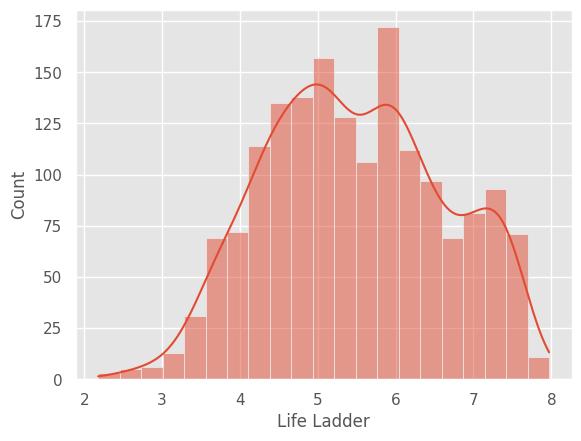

In [ ]:
#@title Life Ladder Histogram
# Histogram for Happiness Score

ax = sns.histplot(sorted_df['Life Ladder'], kde=True)

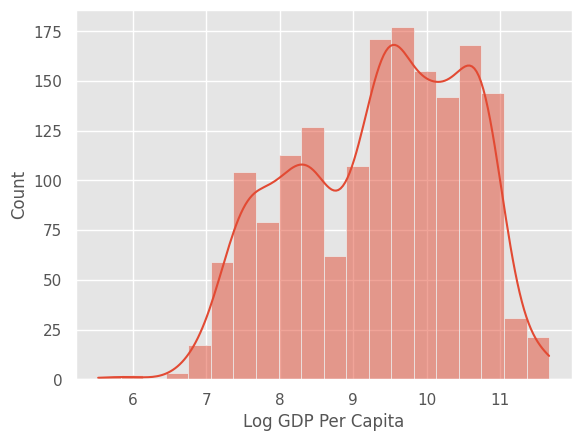

In [ ]:
#@title GDP Per Capita Histogram
# Histogram for Monetary Value by Country

ax = sns.histplot(sorted_df['Log GDP Per Capita'], kde=True)


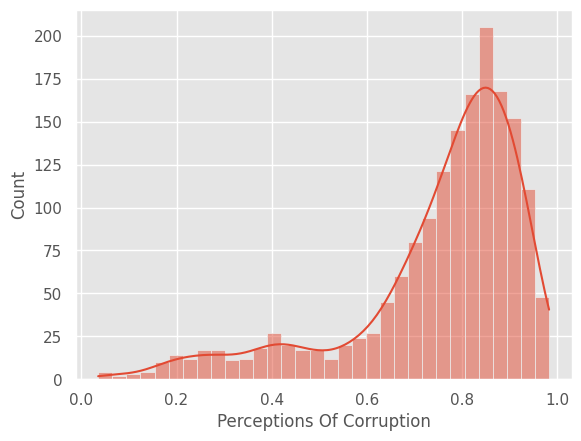

In [ ]:
#@title Perceptions Of Corruption Histogram
# Histogram for Percieved Corruption
ax = sns.histplot(sorted_df['Perceptions Of Corruption'], kde=True)

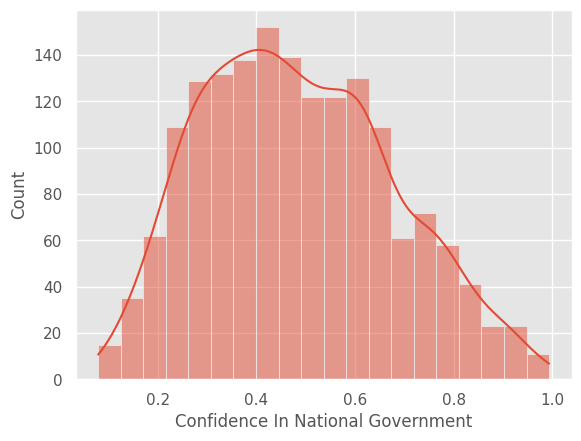

In [ ]:
#@title Confidence In National Government Histogram
# Histogram for Trust in Government
ax = sns.histplot(sorted_df['Confidence In National Government'], kde=True)

# **H Y P O T H E S I S   #  1 :**

H0: There is no significant correlation in score between Life Ladder and GDP Per Capita

Ha: There is a significant correlation in score between Life Ladder and GDP Per Capita

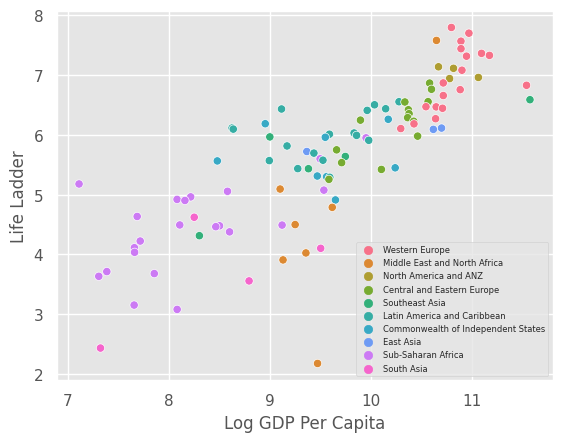

In [ ]:
#@title Visualizations:
# Scatterplot in most recent year 2021
sns.scatterplot(x="Log GDP Per Capita", y="Life Ladder", hue='Regional Indicator', data=recent_df)

plt.legend(fontsize="6", loc ="lower right")


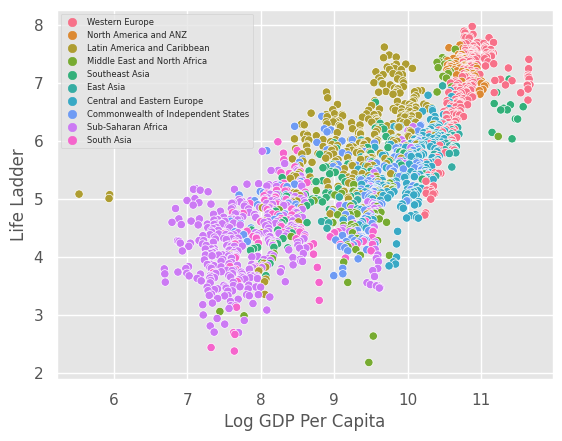

In [ ]:
# Scatterplot over all years documented
sns.scatterplot(x="Log GDP Per Capita", y="Life Ladder", hue='Regional Indicator', data=sorted_df)

plt.legend(fontsize="6", loc ="upper left")

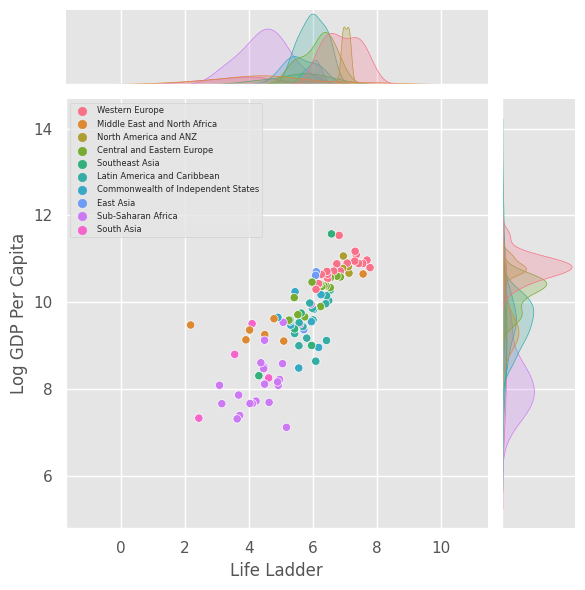

In [ ]:
# Jointplot most recent year 2021
sns.jointplot(x='Life Ladder', y='Log GDP Per Capita', hue='Regional Indicator', data=recent_df)
plt.legend(fontsize="6", loc ="upper left")

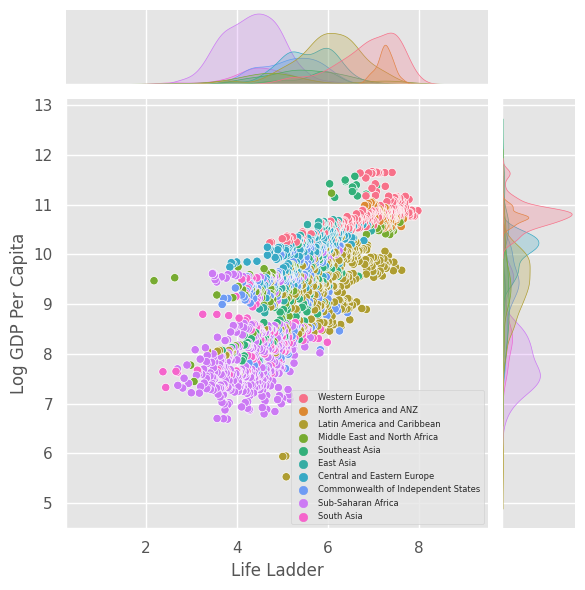

In [ ]:
# Jointplot over all years
sns.jointplot(x='Life Ladder', y='Log GDP Per Capita', hue='Regional Indicator', data=sorted_df)
plt.legend(fontsize="6", loc ="lower right")

In [ ]:
#@title Happiness Score & GDP per Capita Correlations
sorted_df[['Life Ladder', 'Log GDP Per Capita']].describe()


,Life Ladder,Log GDP Per Capita
count,1683.000000,1683.000000
mean,5.484487,9.355232
std,1.149633,1.154303
min,2.178809,5.526723
25%,4.620406,8.427542
50%,5.431614,9.508173
75%,6.319366,10.316836
max,7.970892,11.663788


In [ ]:
#@title Pearson Correlation Test
# Correlation between Happiness Score & GDP per Capita

stats.pearsonr(sorted_df['Life Ladder'], sorted_df['Log GDP Per Capita'])

# There is a significant correlation

PearsonRResult(statistic=0.7925716420075085, pvalue=0.0)

In [ ]:
#@title Independent-samples T-test
stats.ttest_ind(sorted_df['Log GDP Per Capita'], sorted_df['Life Ladder'])

# Ha: There is a significant correlation in score between Life Ladder and GDP per Capita


Ttest_indResult(statistic=97.47207021606356, pvalue=0.0)

In [ ]:
# Result for two sample population ~ Hypothesis #1
hyp1_ttest = stats.ttest_ind(sorted_df['Log GDP Per Capita'], sorted_df['Life Ladder'])
s, p = hyp1_ttest
print("Result: ")
if p <= 0.05:
      print("Ha: There is a significant correlation")
else:
    print("H0: There is no significant correlation")
print(hyp1_ttest)

Result: 
Ha: There is a significant correlation
Ttest_indResult(statistic=97.47207021606356, pvalue=0.0)


**Result:**
### *Ha: There is a significant correlation in score between Life Ladder and GDP per Capita*



# **H Y P O T H E S I S   #  2 :**

H0: There is no significant correlation in score between Perceptions Of Corruption and Confidence in National Government

Ha: There is a significant correlation in score between Perceptions Of Corruption and Confidence in National Government

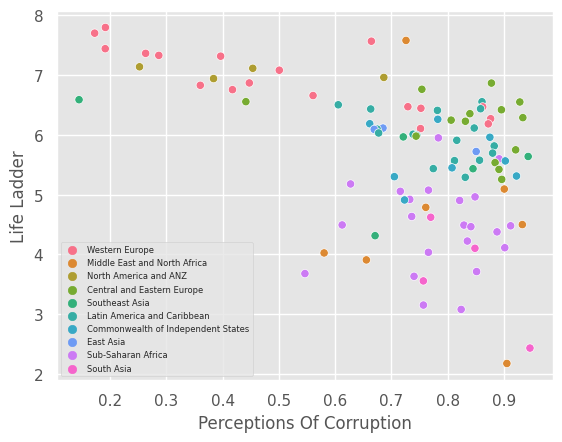

In [ ]:
#@title Visualizations:
# Scatterplot in most recent year 2021 ~ Corruption
sns.scatterplot(x="Perceptions Of Corruption", y="Life Ladder", hue='Regional Indicator', data=recent_df)

plt.legend(fontsize="6", loc ="lower left")

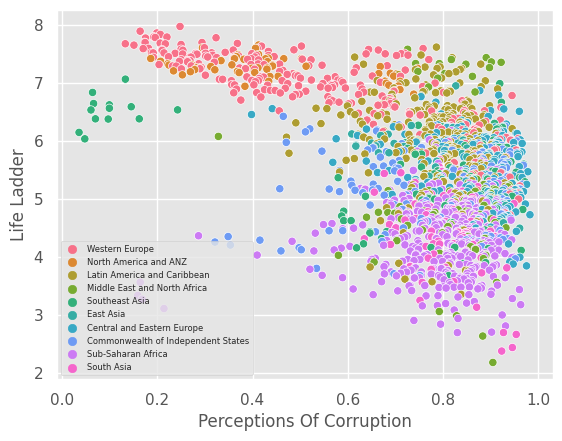

In [ ]:
# Scatterplot over years ~ Corruption
sns.scatterplot(x="Perceptions Of Corruption", y="Life Ladder", hue='Regional Indicator', data=sorted_df)

plt.legend(fontsize="6", loc ="lower left")

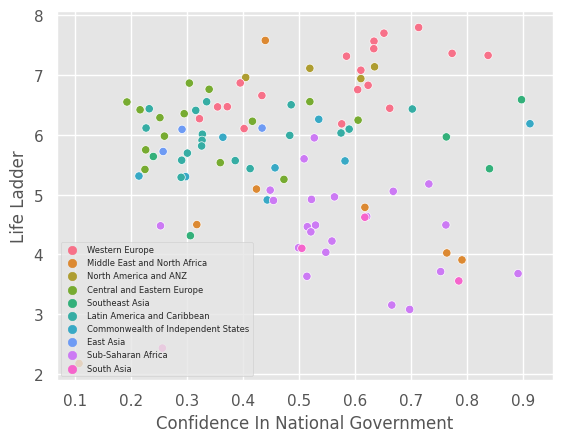

In [ ]:
# Scatterplot in most recent year 2021 ~ Confidence In Gov.
sns.scatterplot(x="Confidence In National Government", y="Life Ladder", hue='Regional Indicator', data=recent_df)

plt.legend(fontsize="6", loc ="lower left")

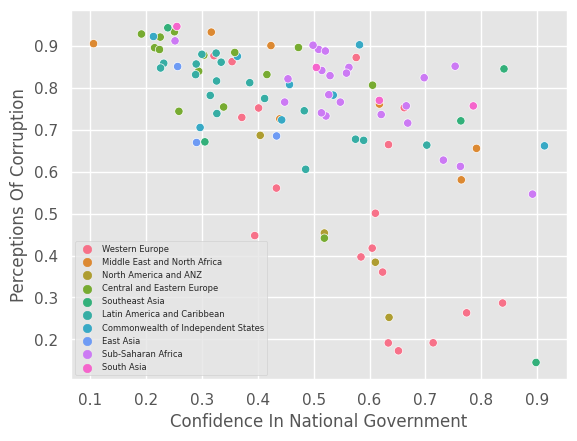

In [ ]:
# Scatterplot in most recent year 2021 ~ Confidence In Gov. x Corruption
sns.scatterplot(x="Confidence In National Government", y="Perceptions Of Corruption", hue='Regional Indicator', data=recent_df)

plt.legend(fontsize="6", loc ="lower left")

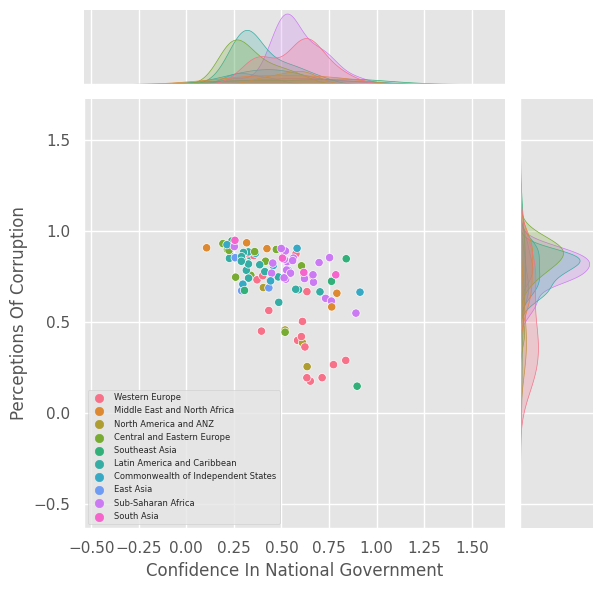

In [ ]:
# Jointplot most recent year 2021
sns.jointplot(x='Confidence In National Government', y='Perceptions Of Corruption', hue='Regional Indicator', data=recent_df)
plt.legend(fontsize="6", loc ="lower left")

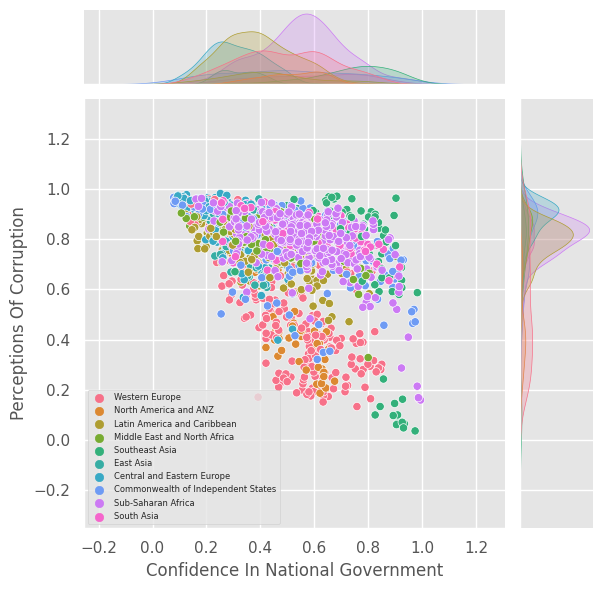

In [ ]:
# Jointplot over years
sns.jointplot(x='Confidence In National Government', y='Perceptions Of Corruption', hue='Regional Indicator', data=sorted_df)
plt.legend(fontsize="6", loc ="lower left")

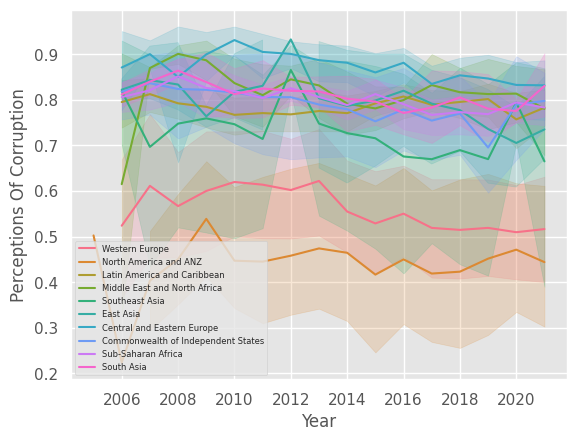

In [ ]:
# lineplot over years: Corruption
sns.lineplot(x="Year", y="Perceptions Of Corruption", hue="Regional Indicator", data=sorted_df)
plt.legend(fontsize="6", loc ="lower left")

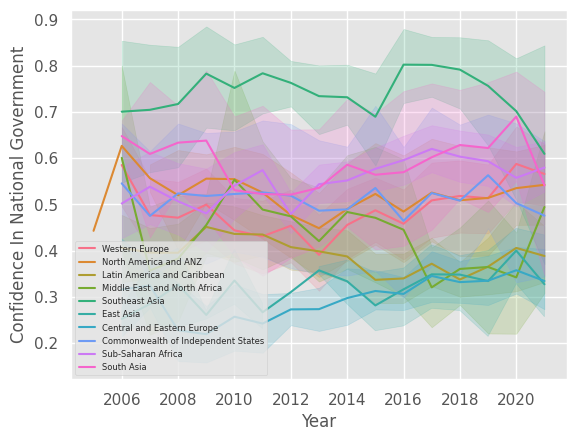

In [ ]:
# lineplot over years: Confidence in Gov
sns.lineplot(x="Year", y="Confidence In National Government", hue="Regional Indicator", data=sorted_df)
plt.legend(fontsize="6", loc ="lower left")

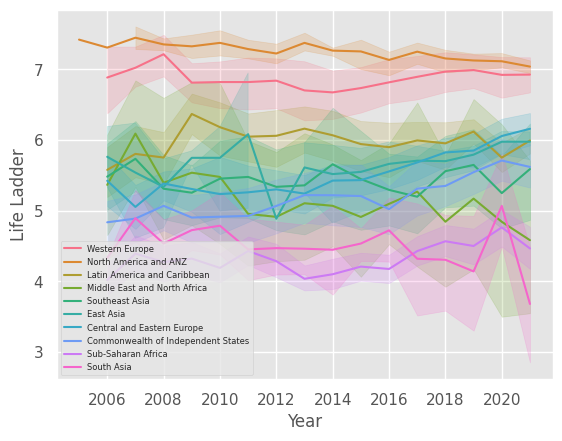

In [ ]:
# lineplot over years: Life Ladder
sns.lineplot(x="Year", y="Life Ladder", hue="Regional Indicator", data=sorted_df)
plt.legend(fontsize="6", loc ="lower left")

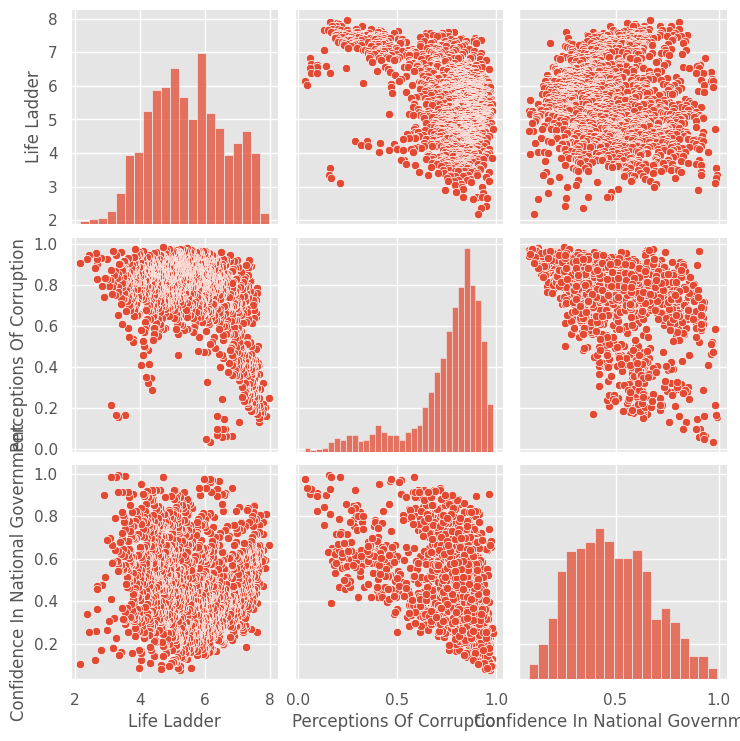

In [ ]:
# compare all variables against each other in a matrix of plots
hyp2_df = sorted_df[['Life Ladder', 'Perceptions Of Corruption', 'Confidence In National Government']]
sns.pairplot(hyp2_df)


In [ ]:
#@title Independent-samples T-test
stats.ttest_ind(sorted_df['Confidence In National Government'], sorted_df['Perceptions Of Corruption'])

# Ha: There is a significant correlation in score between Life Ladder and GDP per Capita


Ttest_indResult(statistic=-40.878730684728346, pvalue=5.9721884600252e-297)

In [ ]:
#@title Perceptions of Corruption & Confidence in National Government & Life Ladder Correlations
sorted_df[['Life Ladder', 'Perceptions Of Corruption', 'Confidence In National Government']].corr()


,Life Ladder,Perceptions Of Corruption,Confidence In National Government
Life Ladder,1.000000,-0.492163,-0.068647
Perceptions Of Corruption,-0.492163,1.000000,-0.455981
Confidence In National Government,-0.068647,-0.455981,1.000000


In [ ]:
#@title Pearson Correlation Test
# Correlation between Confidence In National Government & Perceptions Of Corruption

stats.pearsonr(sorted_df['Confidence In National Government'], sorted_df['Perceptions Of Corruption'])

# There is a significant correlation

PearsonRResult(statistic=-0.4559807355877245, pvalue=3.5097400056061667e-87)

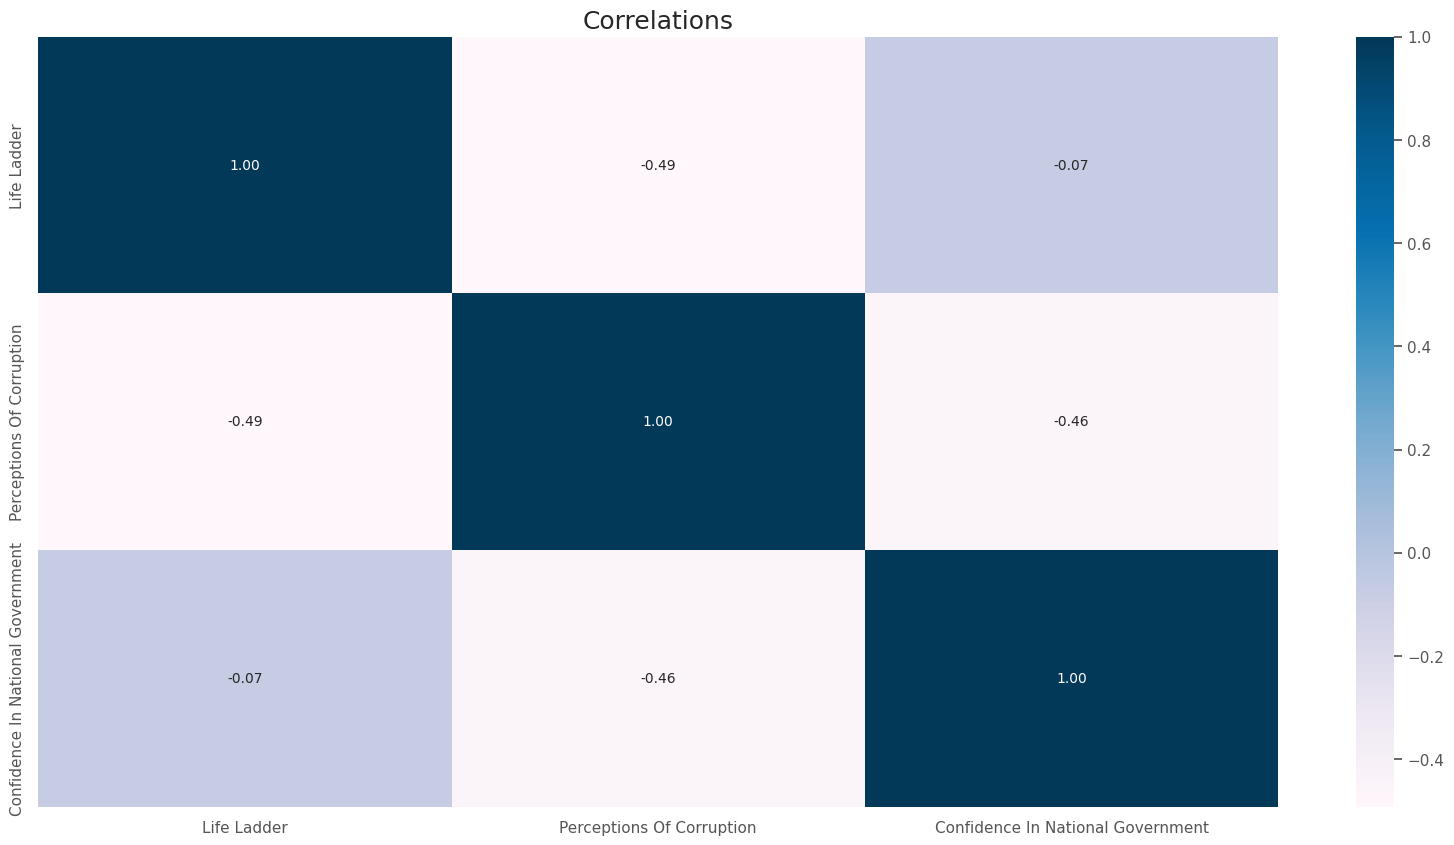

In [ ]:
plt.figure(figsize=(20,10))
cor = hyp2_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu, fmt = '.2f')
plt.title("Correlations", fontsize = 18)
plt.show()

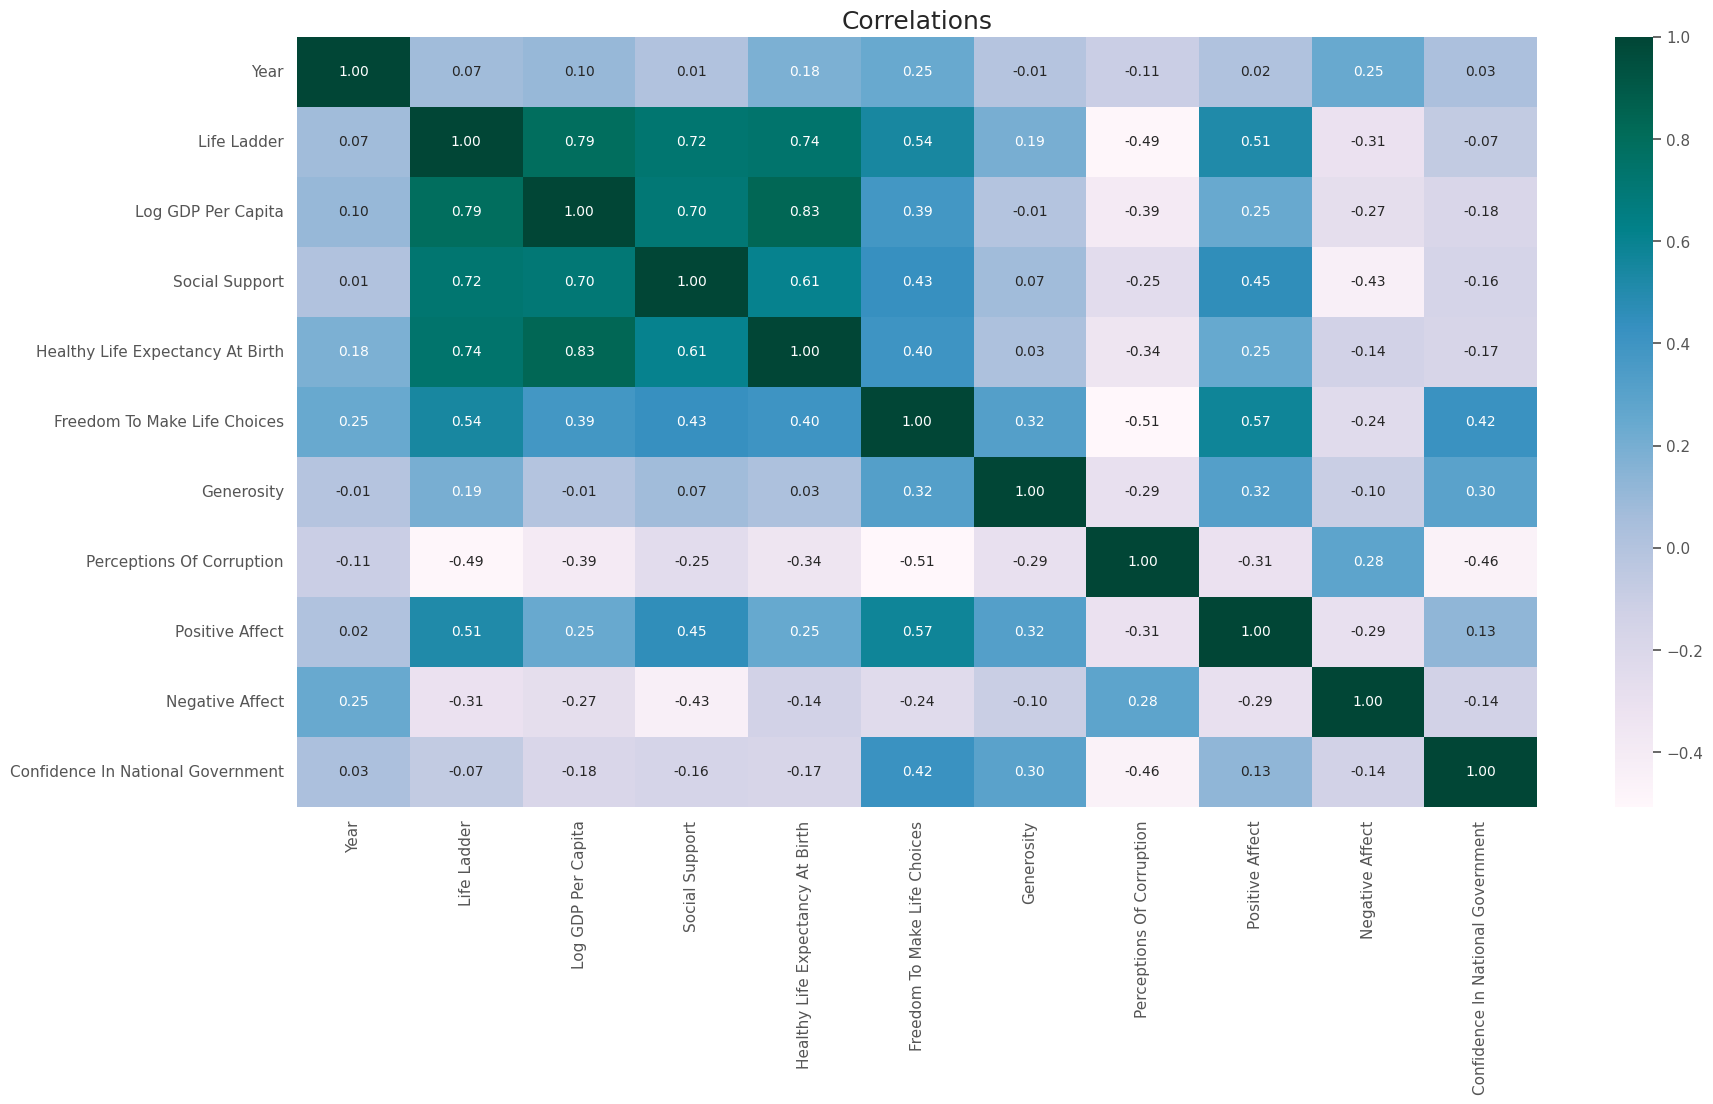

In [ ]:
# correlations throughout full DataFrame for reference
plt.figure(figsize=(20,10))
cor = sorted_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBuGn, fmt = '.2f')
plt.title("Correlations", fontsize = 18)
plt.show()

In [ ]:
hyp2_ttest_corruption = stats.ttest_ind(sorted_df['Perceptions Of Corruption'], sorted_df['Life Ladder'])
s, p = hyp2_ttest_corruption
print("Result: ")
if p <= 0.05:
      print("Ha: There is a significant correlation")
else:
    print("H0: There is no significant correlation")
print(hyp2_ttest_corruption)

Result: 
Ha: There is a significant correlation
Ttest_indResult(statistic=-166.7670839607837, pvalue=0.0)


In [ ]:
hyp2_ttest_government = stats.ttest_ind(sorted_df['Confidence In National Government'], sorted_df['Life Ladder'])
s, p = hyp2_ttest_government
print("Result: ")
if p <= 0.05:
      print("Ha: There is a significant correlation")
else:
    print("H0: There is no significant correlation")
print(hyp2_ttest_government)

Result: 
Ha: There is a significant correlation
Ttest_indResult(statistic=-175.9802251557604, pvalue=0.0)


In [ ]:
hyp2_ttest = stats.ttest_ind(sorted_df['Perceptions Of Corruption'], sorted_df['Confidence In National Government'])
s, p = hyp2_ttest
print("Result: ")
if p <= 0.05:
      print("Ha: There is a significant correlation")
else:
    print("H0: There is no significant correlation")
print(hyp2_ttest)

Result: 
Ha: There is a significant correlation
Ttest_indResult(statistic=40.878730684728346, pvalue=5.9721884600252e-297)


**Result:**
### *Ha: There is a significant correlation in score between Perceptions Of Corruption and Confidence In National Government*


# **C O N C L U S I O N**

**Recommendations:**

*   The Top 10 Countries with the highest Happiness Scores and GDP are Finland, Denmark, Israel, Iceland, Sweden, Norway, Switzerland, Netherlands, New Zealand, and Australia.

*   The Bottom 10 Countries with the lowest Happiness Scores and GDP are Egypt, Jordan, Sierra Leone, Tanzania, Malawi, India, Zimbabwe, Zambia, Afghanistan, and Lebanon.

* There is an overall correlation that suggests happiness increases in countries with higher GDP Per Capita's.

* There is an overall correlation that suggests when a country has more corruption, their confidence in the national government also decreases. This also suggests a decrease in happiness.


**|  THANK YOU**